# Logistic regression

### Description: 

    The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

    One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

    In this challenge, complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [124]:
test_data = pd.read_csv('test.csv', engine='python', sep=",")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
train_data = pd.read_csv('train.csv', engine='python', sep=",")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
test_data.shape

(418, 11)

In [127]:
train_data.shape

(891, 12)

In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [129]:
# ===> unique values count:
train_data.PassengerId.nunique()

891

In [130]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [131]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [132]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [133]:
train_data.Cabin.value_counts().head(10)
print(train_data[train_data.Cabin.isnull() == False]['Pclass'].value_counts())
print(train_data[train_data.Cabin.isnull() == False]['Survived'].value_counts())

1    176
2     16
3     12
Name: Pclass, dtype: int64
1    136
0     68
Name: Survived, dtype: int64


In [134]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [135]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [136]:
train_data.Ticket.nunique()

681

In [137]:
t = train_data.Ticket.value_counts()
train_data['TicketCoPassengers'] = train_data.Ticket.apply(lambda x: t[x]-1) 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketCoPassengers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [138]:
t = test_data.Ticket.value_counts()
test_data['TicketCoPassengers'] = test_data.Ticket.apply(lambda x: t[x]-1)

In [139]:
train_data.Ticket.value_counts().head(10)

1601            7
347082          7
CA. 2343        7
347088          6
3101295         6
CA 2144         6
S.O.C. 14879    5
382652          5
113781          4
347077          4
Name: Ticket, dtype: int64

In [140]:
train_data[train_data.Ticket == '110152']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketCoPassengers
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S,2
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S,2
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,2


In [141]:
train_data.groupby('Ticket').TicketCoPassengers.count().head()

Ticket
110152    3
110413    3
110465    2
110564    1
110813    1
Name: TicketCoPassengers, dtype: int64

In [142]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Pclass                891 non-null int64
Name                  891 non-null object
Sex                   891 non-null object
Age                   714 non-null float64
SibSp                 891 non-null int64
Parch                 891 non-null int64
Ticket                891 non-null object
Fare                  891 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
TicketCoPassengers    891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [143]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketCoPassengers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [144]:
train_data.isnull().sum(axis=0) / train_data.shape[0]

PassengerId           0.000000
Survived              0.000000
Pclass                0.000000
Name                  0.000000
Sex                   0.000000
Age                   0.198653
SibSp                 0.000000
Parch                 0.000000
Ticket                0.000000
Fare                  0.000000
Cabin                 0.771044
Embarked              0.002245
TicketCoPassengers    0.000000
dtype: float64

In [145]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Shelley, Mrs. William (Imanita Parrish Hall)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [146]:
train_data.Age.value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

### Univariate: 

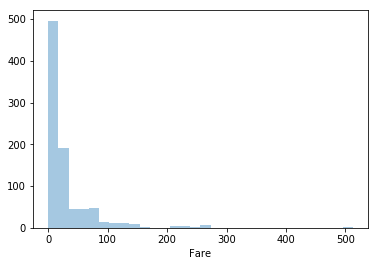

In [147]:
sns.distplot(train_data.Fare.dropna(), kde=False, bins=30)

#### No.of co-passengers:

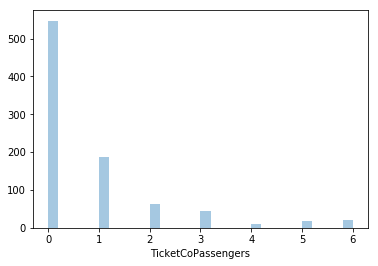

In [148]:
sns.distplot(train_data.TicketCoPassengers.dropna(), kde=False, bins=30)

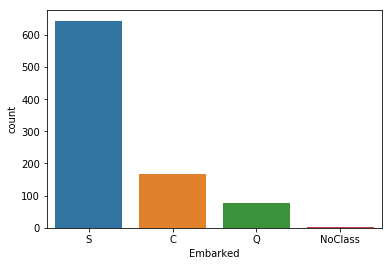

In [149]:
sns.countplot(train_data.Embarked.fillna('NoClass'))

#### Survival rate:

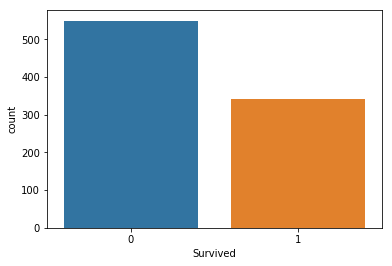

In [150]:
sns.countplot(train_data.Survived)

#### Family siblings:

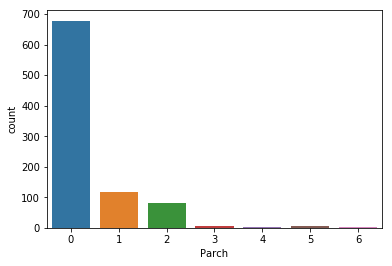

In [151]:
sns.countplot(train_data.Parch) 

### Bi-variate analysis: 

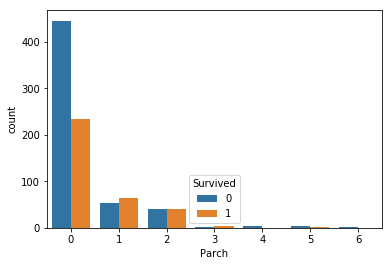

In [152]:
sns.countplot(hue='Survived', x='Parch', orient='h', data=train_data, )

In [153]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Pclass                891 non-null int64
Name                  891 non-null object
Sex                   891 non-null object
Age                   714 non-null float64
SibSp                 891 non-null int64
Parch                 891 non-null int64
Ticket                891 non-null object
Fare                  891 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
TicketCoPassengers    891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


#### Embarked survival rate: 

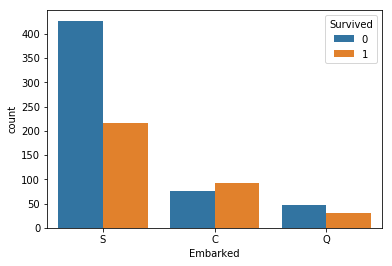

In [154]:
sns.countplot(x=train_data.Embarked, hue=train_data.Survived)

#### Survival chances based on class:

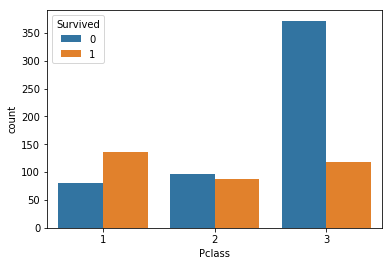

In [155]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)

Note: Can see that First Class passengers has more survival chances.

#### Survival chances based on gender:

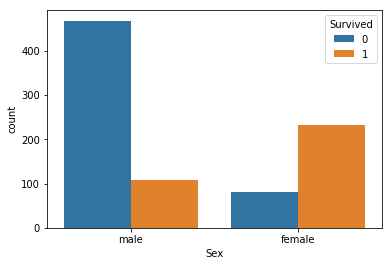

In [156]:
sns.countplot(x='Sex', hue='Survived', data=train_data)

Note: Female has more survival chances than men.

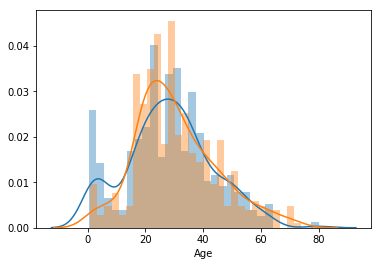

In [157]:
plt.figure()
sns.distplot(train_data[train_data.Survived == 1].Age.dropna(), bins=30)
sns.distplot(train_data[train_data.Survived == 0].Age.dropna(), bins=30)
plt.show()

Note: Survival rate of age below 20 is more compared to other age group

### Feature engineering:

#### Age column: 

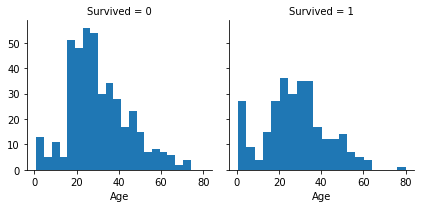

In [158]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [159]:
train_data.Age = train_data.Age.fillna(train_data.Age.mean())
test_data.Age = test_data.Age.fillna(test_data.Age.mean())

In [160]:
train_data.Age.isnull().sum(axis=0)

0

In [161]:
bins = [0, 15, 40, 60, 120]
labels = [1, 2, 3, 4]
train_data['age_bin'] = pd.cut(train_data.Age, bins=bins, labels=labels)
test_data['age_bin'] = pd.cut(test_data.Age, bins=bins, labels=labels)

In [162]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketCoPassengers,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2


#### Fare column: 

<Figure size 432x288 with 0 Axes>

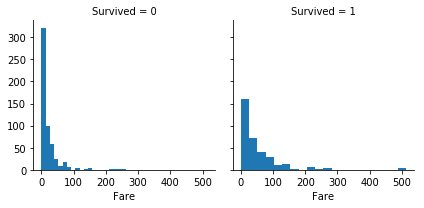

In [163]:
plt.figure()
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Fare', bins=20)
plt.show()

In [164]:
train_data.Fare = train_data.Fare.fillna(train_data.Fare.mean())
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

In [165]:
bins = [-1, 50, 100, 200, 10000]
labels = [1, 2, 3, 4]
train_data['Fare_bins'] = pd.cut(train_data.Fare, bins=bins, labels=labels)
test_data['Fare_bins'] = pd.cut(test_data.Fare, bins=bins, labels=labels)

#### Embarked column:

In [166]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [167]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketCoPassengers,age_bin,Fare_bins
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,2,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,4,2


In [168]:
train_data.Embarked = train_data.Embarked.fillna('S')
test_data.Embarked = test_data.Embarked.fillna('S')

In [169]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketCoPassengers,age_bin,Fare_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,1


In [170]:
train_data.Sex = train_data.Sex.map({'male': 1, 'female': 0})
test_data.Sex = test_data.Sex.map({'male': 1, 'female': 0})

In [171]:
# ===> 
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Pclass', 'Embarked'], drop_first=True)
train_data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,TicketCoPassengers,age_bin,Fare_bins,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,2,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,2,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,2,1,0,1,0,1


In [172]:
train_data.drop(columns=['Age', 'Fare', 'Ticket'], inplace=True)
test_data.drop(columns=['Age', 'Fare', 'Ticket'], inplace=True)

#### Title Column:

In [173]:
train_data.loc[:, 'Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data.loc[:, 'Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [174]:
pd.crosstab(train_data.Title, train_data.Survived)

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [175]:
def replaceTitles(_data):
    _data['Title'] = _data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    _data['Title'] = _data['Title'].replace('Mlle', 'Miss')
    _data['Title'] = _data['Title'].replace('Ms', 'Miss')
    _data['Title'] = _data['Title'].replace('Mme', 'Mrs')
    return _data

train_data = replaceTitles(train_data)
test_data = replaceTitles(test_data)
print(train_data['Title'].value_counts())
print(test_data['Title'].value_counts())

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64


In [176]:
train_data = pd.get_dummies(train_data, columns=['Title'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Title'], drop_first=True)

In [177]:
train_data.drop(columns=['Name'], inplace=True)
test_data.drop(columns=['Name'], inplace=True)

In [178]:
train_data.head()

,PassengerId,Survived,Sex,SibSp,Parch,Cabin,TicketCoPassengers,age_bin,Fare_bins,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,1,1,0,NaN,0,2,1,0,1,0,1,0,1,0,0
1,2,1,0,1,0,C85,0,2,2,0,0,0,0,0,0,1,0
2,3,1,0,0,0,NaN,0,2,1,0,1,0,1,1,0,0,0
3,4,1,0,1,0,C123,1,2,2,0,0,0,1,0,0,1,0
4,5,0,1,0,0,NaN,0,2,1,0,1,0,1,0,1,0,0


In [179]:
#====> Fill cabin NaN as not assigned
train_data.drop(columns=['Cabin', 'PassengerId'], inplace=True)
test_data.drop(columns=['Cabin', 'PassengerId'], inplace=True)
# train_data.Cabin.fillna('NotAssigned').head()

In [180]:
# train_data = pd.get_dummies(train_data, columns=['Cabin'], drop_first=True)
# train_data.head()

In [181]:
train_data.head()

,Survived,Sex,SibSp,Parch,TicketCoPassengers,age_bin,Fare_bins,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,1,1,0,0,2,1,0,1,0,1,0,1,0,0
1,1,0,1,0,0,2,2,0,0,0,0,0,0,1,0
2,1,0,0,0,0,2,1,0,1,0,1,1,0,0,0
3,1,0,1,0,1,2,2,0,0,0,1,0,0,1,0
4,0,1,0,0,0,2,1,0,1,0,1,0,1,0,0


In [182]:
test_data.head()

,Sex,SibSp,Parch,TicketCoPassengers,age_bin,Fare_bins,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,0,0,2,1,0,1,1,0,0,1,0,0
1,0,1,0,0,3,1,0,1,0,1,0,0,1,0
2,1,0,0,0,4,1,1,0,1,0,0,1,0,0
3,1,0,0,0,2,1,0,1,0,1,0,1,0,0
4,0,1,1,0,2,1,0,1,0,1,0,0,1,0


In [184]:
x_train = train_data.drop(columns=['Survived'])
y_train = train_data.Survived

### Modeling: 

**We can try different categorical models and try to see for best fit of the model**

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Decision Tree
* Random Forrest

#### Logistic Regression: 

In [185]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(test_data)
log_reg.score(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.819304152637486

In [188]:
log_reg.coef_[0]

array([-0.11225988, -0.41465965, -0.26051771, -0.01516854, -0.47424329,
        0.52410937, -0.55986429, -1.52983649, -0.05069401, -0.3018723 ,
        0.28068525, -2.3920887 ,  0.85178985, -1.58529216])

In [192]:
corr = pd.DataFrame({'features': x_train.columns, 'coff': log_reg.coef_[0]}).sort_values(by='coff', ascending=False)
corr

,features,coff
12,Title_Mrs,0.851790
5,Fare_bins,0.524109
10,Title_Miss,0.280685
3,TicketCoPassengers,-0.015169
8,Embarked_Q,-0.050694
0,Sex,-0.112260
2,Parch,-0.260518
9,Embarked_S,-0.301872
1,SibSp,-0.414660
4,age_bin,-0.474243


In [193]:
train_data.shape

(891, 15)

##### GridsearchCV for parameter tuning: 

In [214]:
g_logit = LogisticRegression()
params = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2"]  # l1 lasso l2 ridge
}
kfold = KFold(n_splits=2, random_state=101, shuffle=True)

grid = GridSearchCV(g_logit,
                    param_grid=params,
                    n_jobs=-1,
                    verbose=True,
                    return_train_score=True,
                    scoring='accuracy',
                    cv=kfold)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    3.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=True)

In [215]:
grid.best_score_

0.8237934904601572

In [217]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
8,0.031024,0.006775,0.002449,0.000072,10,l1,"{'C': 10.0, 'penalty': 'l1'}",0.822870,0.824719,0.823793,0.000925,1,0.833708,0.829596,0.831652,0.002056
6,0.008549,0.000718,0.002396,0.000048,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.822870,0.817978,0.820426,0.002446,2,0.824719,0.831839,0.828279,0.003560
10,0.046588,0.000220,0.002274,0.000065,100,l1,"{'C': 100.0, 'penalty': 'l1'}",0.813901,0.826966,0.820426,0.006532,2,0.826966,0.822870,0.824918,0.002048
12,0.054968,0.003259,0.001513,0.000017,1000,l1,"{'C': 1000.0, 'penalty': 'l1'}",0.813901,0.826966,0.820426,0.006532,2,0.826966,0.822870,0.824918,0.002048
13,0.006582,0.000091,0.002206,0.000007,1000,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.813901,0.826966,0.820426,0.006532,2,0.826966,0.822870,0.824918,0.002048
9,0.014063,0.001858,0.002818,0.000274,10,l2,"{'C': 10.0, 'penalty': 'l2'}",0.818386,0.820225,0.819304,0.000920,6,0.831461,0.831839,0.831650,0.000189
11,0.008307,0.001754,0.002262,0.000023,100,l2,"{'C': 100.0, 'penalty': 'l2'}",0.813901,0.824719,0.819304,0.005409,6,0.826966,0.822870,0.824918,0.002048
7,0.013901,0.007859,0.002312,0.000326,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.818386,0.813483,0.815937,0.002451,8,0.822472,0.825112,0.823792,0.001320
5,0.011067,0.004944,0.002442,0.000033,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.818386,0.797753,0.808081,0.010316,9,0.797753,0.816143,0.806948,0.009195
4,0.010546,0.003442,0.002880,0.000216,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.798206,0.784270,0.791246,0.006968,10,0.788764,0.798206,0.793485,0.004721


In [275]:
logit_alog = grid.best_estimator_
logit_alog.fit(x_train, y_train)
logit_y_predict = logit_alog.predict(test_data)
print("Accuracy score for the logistic regression::", logit_alog.score(x_train, y_train)*100)

Accuracy score for the logistic regression:: 83.05274971941638


### KNN algorithm: 

In [195]:
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(test_data)

In [196]:
knn.score(x_train, y_train)

0.8417508417508418

In [197]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')>

##### GridsearchCV for parameter tuning: 

In [222]:
g_knn = KNeighborsClassifier()
params = {
    'n_neighbors': range(2, 20),
    'leaf_size': range(4, 40, 4)
}

kfold = KFold(n_splits=2, shuffle=True, random_state=101)

grid = GridSearchCV(g_knn,
                    param_grid=params,
                    cv=kfold,
                    n_jobs=-1,
                    scoring='accuracy',
                    verbose=True,
                    return_train_score=True)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 317 out of 324 | elapsed:    8.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    8.0s finished


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'leaf_size': range(4, 40, 4),
                         'n_neighbors': range(2, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=True)

In [223]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [224]:
grid.best_score_

0.8226711560044894

In [225]:
grid.best_params_

{'leaf_size': 8, 'n_neighbors': 16}

In [226]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
50,0.006807,0.001254,0.034772,0.004698,12,16,"{'leaf_size': 12, 'n_neighbors': 16}",0.825112,0.820225,0.822671,0.002444,1,0.829213,0.838565,0.833889,0.004676
32,0.008386,0.000690,0.054117,0.008910,8,16,"{'leaf_size': 8, 'n_neighbors': 16}",0.825112,0.820225,0.822671,0.002444,1,0.829213,0.838565,0.833889,0.004676
64,0.005918,0.001328,0.030325,0.000090,16,12,"{'leaf_size': 16, 'n_neighbors': 12}",0.820628,0.822472,0.821549,0.000922,3,0.842697,0.829596,0.836147,0.006550
82,0.005728,0.001090,0.026689,0.000077,20,12,"{'leaf_size': 20, 'n_neighbors': 12}",0.820628,0.822472,0.821549,0.000922,3,0.842697,0.829596,0.836147,0.006550
100,0.006416,0.001078,0.026801,0.000567,24,12,"{'leaf_size': 24, 'n_neighbors': 12}",0.820628,0.822472,0.821549,0.000922,3,0.842697,0.829596,0.836147,0.006550
68,0.005072,0.000211,0.027782,0.000906,16,16,"{'leaf_size': 16, 'n_neighbors': 16}",0.829596,0.813483,0.821549,0.008057,3,0.831461,0.829596,0.830529,0.000932
31,0.009644,0.002088,0.084676,0.035354,8,15,"{'leaf_size': 8, 'n_neighbors': 15}",0.827354,0.815730,0.821549,0.005812,3,0.829213,0.834081,0.831647,0.002434
96,0.004791,0.000026,0.029168,0.004470,24,8,"{'leaf_size': 24, 'n_neighbors': 8}",0.827354,0.815730,0.821549,0.005812,3,0.847191,0.836323,0.841757,0.005434
49,0.006879,0.000300,0.036813,0.004794,12,15,"{'leaf_size': 12, 'n_neighbors': 15}",0.827354,0.815730,0.821549,0.005812,3,0.829213,0.834081,0.831647,0.002434
86,0.005085,0.000435,0.026127,0.000066,20,16,"{'leaf_size': 20, 'n_neighbors': 16}",0.829596,0.813483,0.821549,0.008057,3,0.831461,0.829596,0.830529,0.000932


Note: Choose the best model with the train and test accuary.

In [274]:
knn_algo = grid.best_estimator_
knn_algo.fit(x_train, y_train)
knn_y_pred = knn.predict(test_data)
print("Accuracy score for the logistic regression::", knn_algo.score(x_train, y_train)*100)

Accuracy score for the logistic regression:: 83.05274971941638


### Support Vector Machines: 

In [234]:
from sklearn.svm import LinearSVC

In [241]:
svc_alog = SVC()
params = {
    'C': [0.1, 1, 10, 20, 30, 40, 50, 100, 150],
    'kernel': ['rbf']
}
svc_grid = GridSearchCV(svc_alog,
                        param_grid=params,
                        cv=kfold,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=True,
                        return_train_score=True)
svc_grid.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20, 30, 40, 50, 100, 150],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=True)

In [242]:
results = pd.DataFrame(svc_grid.cv_results_)
results.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
1,0.013947,0.000272,0.006226,0.000273,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.831839,0.831461,0.831650,0.000189,1,0.838202,0.845291,0.841747,0.003545
0,0.013943,0.004791,0.009646,0.001305,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.831839,0.820225,0.826038,0.005807,2,0.824719,0.831839,0.828279,0.003560
2,0.025270,0.009192,0.014436,0.008621,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.809417,0.824719,0.817059,0.007651,3,0.860674,0.863229,0.861951,0.001277
3,0.023435,0.001298,0.006748,0.000049,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.804933,0.822472,0.813692,0.008770,4,0.878652,0.869955,0.874303,0.004348
4,0.014024,0.004019,0.004387,0.001020,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.802691,0.824719,0.813692,0.011014,4,0.880899,0.872197,0.876548,0.004351
5,0.009150,0.000367,0.004143,0.000734,40,rbf,"{'C': 40, 'kernel': 'rbf'}",0.804933,0.822472,0.813692,0.008770,4,0.880899,0.874439,0.877669,0.003230
6,0.009110,0.000337,0.004923,0.000296,50,rbf,"{'C': 50, 'kernel': 'rbf'}",0.800448,0.824719,0.812570,0.012135,7,0.883146,0.876682,0.879914,0.003232
7,0.010063,0.001183,0.006741,0.000399,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.798206,0.824719,0.811448,0.013256,8,0.892135,0.883408,0.887771,0.004363
8,0.017572,0.002038,0.004018,0.000239,150,rbf,"{'C': 150, 'kernel': 'rbf'}",0.795964,0.822472,0.809203,0.013254,9,0.896629,0.890135,0.893382,0.003247


In [243]:
svc_grid.best_score_

0.8316498316498316

In [273]:
svc_alog = svc_grid.best_estimator_
svc_alog.fit(x_train, y_train)
svc_y_pred = svc_alog.predict(test_data)
print("Linear SVM algorithm accuracy score:: ", svc_alog.score(x_train, y_train)*100) 

Linear SVM algorithm accuracy score::  83.9506172839506


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Decision Tree algorithm:

In [246]:
decision_alog = DecisionTreeClassifier()

In [248]:
decision_alog.fit(x_train, y_train)
decision_alog.score(x_train, y_train)

0.8877665544332211

##### GridsearchCV for parameter tuning

In [251]:
decision_alog

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [250]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

In [263]:
g_decision_alog = DecisionTreeClassifier()
params = {
    'min_samples_split': range(2, 20, 2),
    'max_leaf_nodes': range(2, 10, 2)
}
decision_tree_grid = GridSearchCV(g_decision_alog,
                                  param_grid=params,
                                  verbose=True,
                                  scoring='accuracy',
                                  return_train_score=True,
                                  cv=kfold,
                                  n_jobs=-1)
decision_tree_grid.fit(x_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': range(2, 10, 2),
                 

In [264]:
decision_tree_grid.best_score_

0.8204264870931538

In [265]:
decision_tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [266]:
result = pd.DataFrame(decision_tree_grid.cv_results_)
result.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
35,0.004463,0.000228,0.001976,5.428791e-04,8,18,"{'max_leaf_nodes': 8, 'min_samples_split': 18}",0.822870,0.817978,0.820426,0.002446,1,0.831461,0.836323,0.833892,0.002431
31,0.004980,0.000197,0.004846,2.272129e-03,8,10,"{'max_leaf_nodes': 8, 'min_samples_split': 10}",0.820628,0.820225,0.820426,0.000202,1,0.833708,0.838565,0.836136,0.002429
27,0.005078,0.000013,0.002659,2.313852e-04,8,2,"{'max_leaf_nodes': 8, 'min_samples_split': 2}",0.820628,0.820225,0.820426,0.000202,1,0.833708,0.838565,0.836136,0.002429
29,0.007330,0.002570,0.001945,3.793240e-04,8,6,"{'max_leaf_nodes': 8, 'min_samples_split': 6}",0.820628,0.820225,0.820426,0.000202,1,0.833708,0.838565,0.836136,0.002429
30,0.005624,0.001883,0.002049,3.328323e-04,8,8,"{'max_leaf_nodes': 8, 'min_samples_split': 8}",0.820628,0.820225,0.820426,0.000202,1,0.833708,0.838565,0.836136,0.002429
28,0.005841,0.000302,0.004078,1.496434e-03,8,4,"{'max_leaf_nodes': 8, 'min_samples_split': 4}",0.820628,0.820225,0.820426,0.000202,1,0.833708,0.838565,0.836136,0.002429
33,0.002891,0.000044,0.001395,5.960464e-07,8,14,"{'max_leaf_nodes': 8, 'min_samples_split': 14}",0.822870,0.817978,0.820426,0.002446,1,0.831461,0.836323,0.833892,0.002431
34,0.004227,0.000463,0.001585,1.252890e-04,8,16,"{'max_leaf_nodes': 8, 'min_samples_split': 16}",0.822870,0.817978,0.820426,0.002446,1,0.831461,0.836323,0.833892,0.002431
32,0.008123,0.000135,0.002604,2.778769e-04,8,12,"{'max_leaf_nodes': 8, 'min_samples_split': 12}",0.820628,0.817978,0.819304,0.001325,9,0.833708,0.836323,0.835015,0.001308
19,0.007791,0.000338,0.002207,2.580881e-04,6,4,"{'max_leaf_nodes': 6, 'min_samples_split': 4}",0.820628,0.817978,0.819304,0.001325,9,0.824719,0.836323,0.830521,0.005802


In [272]:
decision_tree_algo = decision_tree_grid.best_estimator_
decision_tree_algo.fit(x_train, y_train)
dec_tree_y_pred = decision_tree_algo.predict(test_data)
print("Decision Tree alogirthm score:: ", decision_tree_algo.score(x_train, y_train) * 100) 

Decision Tree alogirthm score::  82.82828282828282


In [276]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [277]:
decision_tree_algo

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [278]:
d_alog = DecisionTreeClassifier(max_leaf_nodes=8, min_samples_split=2)
adaboost = AdaBoostClassifier(d_alog, n_estimators=200)
# adaboost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=8,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [280]:
# ada_y_predict = adaboost.predict(test_data)

In [281]:
# adaboost.score(x_train, y_train)

0.8877665544332211

In [287]:
kfold = KFold(n_splits=2, random_state=101, shuffle=True)
algo = DecisionTreeClassifier(max_leaf_nodes=8, min_samples_split=2)
adaboost = AdaBoostClassifier(base_estimator=algo, n_estimators=200)
params = {
    "base_estimator__criterion": ["gini", "entropy"],
    "base_estimator__splitter": ["best", "random"],
    "n_estimators": range(2, 200, 2)
}
adaboost_grid = GridSearchCV(adaboost,
                             param_grid=params,
                             verbose=True,
                             scoring='accuracy',
                             return_train_score=True,
                             cv=kfold,
                             n_jobs=-1)
adaboost_grid.fit(x_train, y_train)

Fitting 2 folds for each of 396 candidates, totalling 792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 745 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 792 out of 792 | elapsed:  1.1min finished


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=8,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                      

In [288]:
adaboost_grid.best_score_

0.819304152637486

In [289]:
result = pd.DataFrame(adaboost_grid.cv_results_)
result.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__criterion,param_base_estimator__splitter,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
298,0.014150,0.001295,0.004479,0.000018,entropy,random,4,"{'base_estimator__criterion': 'entropy', 'base...",0.816143,0.822472,0.819304,0.003164,1,0.856180,0.865471,0.860825,0.004646
0,0.038106,0.005182,0.011673,0.000759,gini,best,2,"{'base_estimator__criterion': 'gini', 'base_es...",0.807175,0.820225,0.813692,0.006525,2,0.853933,0.838565,0.846249,0.007684
297,0.008623,0.000032,0.002881,0.000512,entropy,random,2,"{'base_estimator__criterion': 'entropy', 'base...",0.793722,0.829213,0.811448,0.017746,3,0.835955,0.840807,0.838381,0.002426
197,0.437269,0.001098,0.110199,0.004017,gini,random,198,"{'base_estimator__criterion': 'gini', 'base_es...",0.798206,0.820225,0.809203,0.011009,4,0.901124,0.896861,0.898992,0.002131
100,0.016111,0.003621,0.005277,0.000053,gini,random,4,"{'base_estimator__criterion': 'gini', 'base_es...",0.782511,0.833708,0.808081,0.025598,5,0.856180,0.854260,0.855220,0.000960
64,0.281400,0.002425,0.062343,0.002670,gini,best,130,"{'base_estimator__criterion': 'gini', 'base_es...",0.800448,0.811236,0.805836,0.005394,6,0.901124,0.896861,0.898992,0.002131
178,0.328706,0.000947,0.081966,0.000024,gini,random,160,"{'base_estimator__criterion': 'gini', 'base_es...",0.793722,0.815730,0.804714,0.011004,7,0.901124,0.896861,0.898992,0.002131
1,0.069759,0.004714,0.005936,0.000238,gini,best,4,"{'base_estimator__criterion': 'gini', 'base_es...",0.789238,0.820225,0.804714,0.015494,7,0.867416,0.863229,0.865322,0.002094
191,0.370625,0.011738,0.093186,0.001735,gini,random,186,"{'base_estimator__criterion': 'gini', 'base_es...",0.793722,0.813483,0.803591,0.009881,9,0.901124,0.896861,0.898992,0.002131
196,0.395303,0.009795,0.106074,0.002242,gini,random,196,"{'base_estimator__criterion': 'gini', 'base_es...",0.789238,0.817978,0.803591,0.014370,9,0.901124,0.896861,0.898992,0.002131


In [290]:
adaboost_grid.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'random',
 'n_estimators': 4}

### Random forest:

In [292]:
rfc = RandomForestClassifier()
params = {
    'min_samples_split': range(2, 20, 2),
    'max_leaf_nodes': range(2, 10, 2)
}
rfc_grid = GridSearchCV(rfc,
                        param_grid=params,
                        verbose=True,
                        scoring='accuracy',
                        return_train_score=True,
                        cv=kfold,
                        n_jobs=-1)
rfc_grid.fit(x_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    3.4s finished
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                    

In [293]:
rfc_grid.best_score_

0.8294051627384961

In [294]:
rfc_grid.best_params_

{'max_leaf_nodes': 6, 'min_samples_split': 18}